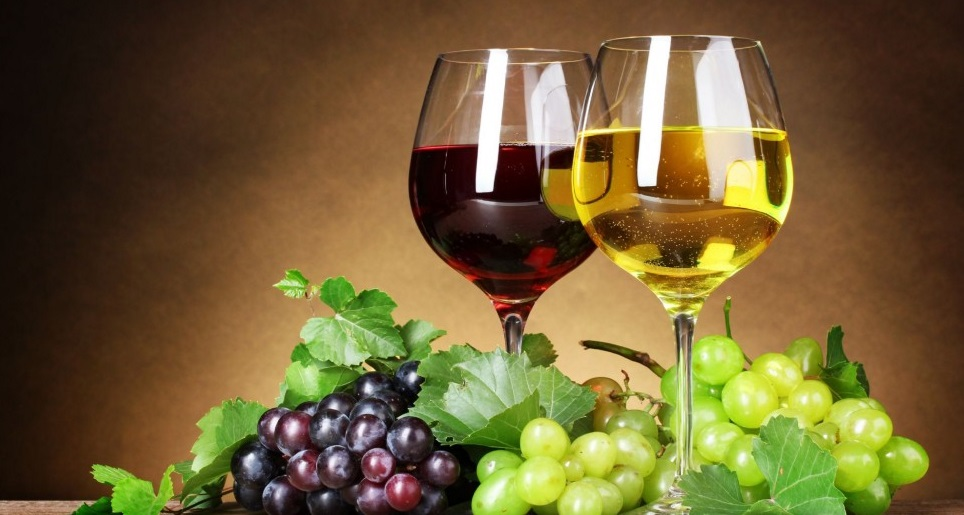

# BUSINESS UNDERSTANDING

In [34]:
# Case de dados para CLASSIFICAÇÃO
# Identificar o tipo de vinho de acordo com as características de vinho tinto e branco presente na base de dados

# DATA UNDERSTANDING

In [35]:
# Base de dados disponibilizada no kaggle para efeito de testes e estudos

[Wine dataset](https://www.kaggle.com/datasets/dell4010/wine-dataset)

# Title

In [36]:
# Aplicando machine learning em base de dados do kaggle

# Head

In [37]:
# estudando machine learning
# by geanclm em 20/02/2022 at 11:47h
# update by geanclm on 24/10/2023

# Local files

In [38]:
!dir

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 9241-82D4

 Pasta de C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning

31/10/2023  19:29    <DIR>          .
29/10/2023  16:48    <DIR>          ..
24/10/2023  09:36                68 .gitattributes
30/10/2023  21:44    <DIR>          .ipynb_checkpoints
30/10/2023  21:42    <DIR>          balanceamento_dados
24/10/2023  09:36             1.091 LICENSE
31/10/2023  19:29           550.724 ML_vinhos_csv.ipynb
24/10/2023  09:36                50 README.md
24/10/2023  10:10           132.201 Vinho-Tinto-e-Vinho-Branco.jpg
31/10/2023  19:04        10.006.697 wine_classifier_etc.joblib
24/10/2023  09:36           384.016 wine_dataset.csv
               7 arquivo(s)     11.074.847 bytes
               4 pasta(s)   882.138.284.032 bytes dispon¡veis


# Library installation

In [39]:
# !pip install -U imbalanced-learn
# !pip install imblearn

# Import libs

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# balancemaneto dos dados em relação ao MAIOR valor de y
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# balancemaneto dos dados em relação ao MENOR valor de y
from imblearn.under_sampling import RandomUnderSampler

# Padronizar os dados
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
from sklearn.preprocessing import MinMaxScaler

import joblib

# Load data

In [41]:
df = pd.read_csv(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_dataset.csv')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [43]:
df.dtypes[df.dtypes.values == 'object'].index

Index(['style'], dtype='object')

In [44]:
df.sample(15).T

,4475,5418,2260,422,3664,2949,2959,335,484,3926,3469,5464,5624,5979,2173
fixed_acidity,6.4,5.1,6.8,7.7,7.8,8.0,6.2,11.9,10.6,7.0,6.3,6.0,6.2,5.7,7.4
volatile_acidity,0.22,0.35,0.25,0.96,0.27,0.57,0.12,0.695,0.44,0.35,0.19,0.31,0.32,0.31,0.2
citric_acid,0.31,0.26,0.34,0.2,0.28,0.39,0.26,0.53,0.68,0.17,0.21,0.38,0.45,0.29,0.33
residual_sugar,13.9,6.8,14.0,2.0,1.8,3.9,5.7,3.4,4.1,1.1,1.8,4.8,2.9,7.3,1.9
chlorides,0.04,0.034,0.032,0.047,0.05,0.034,0.044,0.128,0.114,0.049,0.049,0.04,0.029,0.05,0.035
free_sulfur_dioxide,57.0,36.0,47.0,15.0,21.0,22.0,56.0,7.0,6.0,7.0,35.0,41.0,37.0,33.0,39.0
total_sulfur_dioxide,135.0,120.0,133.0,60.0,127.0,122.0,158.0,21.0,24.0,119.0,163.0,101.0,94.0,143.0,138.0
density,0.99672,0.99188,0.9952,0.9955,0.9934,0.9917,0.9951,0.9992,0.997,0.99297,0.9924,0.98968,0.98998,0.99332,0.991
pH,3.21,3.38,3.37,3.36,3.15,3.29,3.52,3.17,3.06,3.13,3.31,3.24,3.25,3.31,3.17
sulphates,0.38,0.4,0.5,0.44,0.44,0.67,0.37,0.84,0.66,0.36,0.5,0.56,0.6,0.5,0.44


In [45]:
# filtrar dado específico do data frame
df.loc[0:4,'fixed_acidity']

0     7.4
1     7.8
2     7.8
3    11.2
4     7.4
Name: fixed_acidity, dtype: float64

In [46]:
df.shape

(6497, 13)

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [48]:
df['style']

0         red
1         red
2         red
3         red
4         red
        ...  
6492    white
6493    white
6494    white
6495    white
6496    white
Name: style, Length: 6497, dtype: object

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            DATA PREPARATION
        </b>
    <br/>&nbsp;
</center>

In [49]:
df['style'] = df['style'].replace('red', 0)
df['style'] = df['style'].replace('white', 1)

In [50]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [51]:
# 1 - VERIFICAR NECESSIDADE DE APLICAR O GET DUMMIES para cada base de dados
# df_d = pd.get_dummies(df)
# df_d.sample(5)

# DATA VISUALIZATION

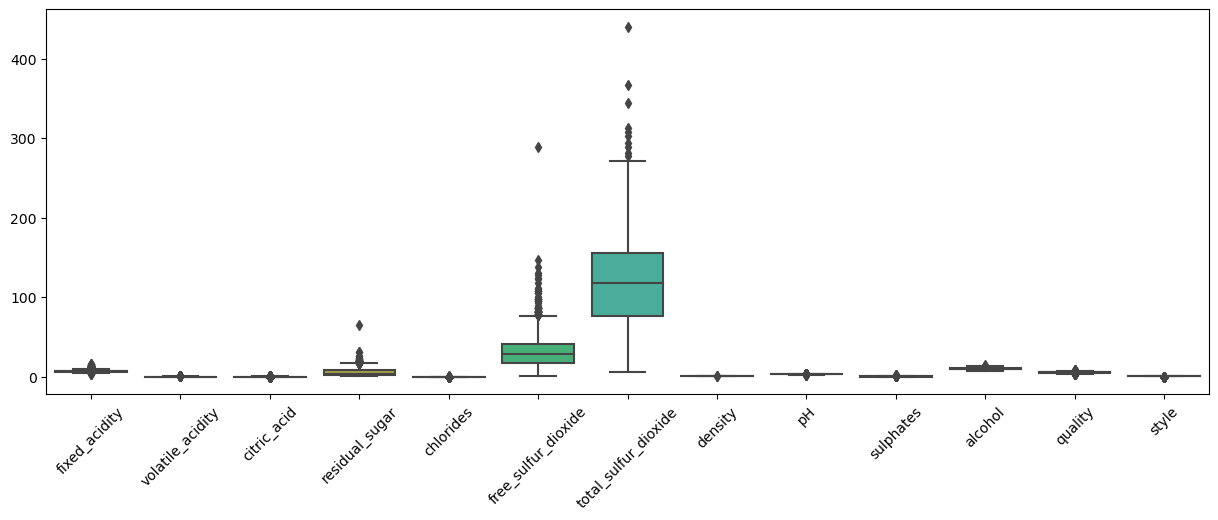

In [52]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df)

# Rotacionar a legenda do eixo x em 45 graus
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show();

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            MODELING
        </b>
    <br/>&nbsp;
</center>

In [53]:
# Divisão dos dados em X e y
X = df.drop('style', axis = 1)
y = df['style']
X.shape, y.shape

((6497, 12), (6497,))

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [55]:
y.mean()

0.7538864091118977

In [56]:
df.groupby('style').size()

style
0    1599
1    4898
dtype: int64

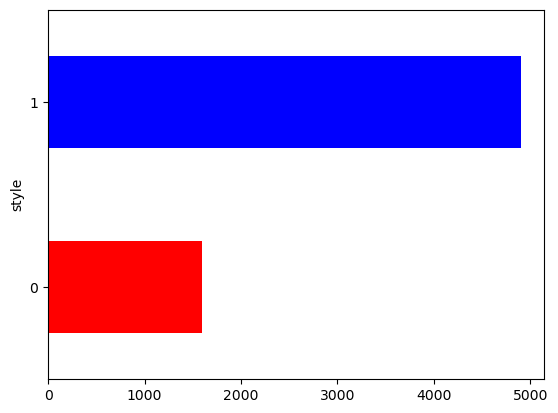

In [57]:
y.value_counts(ascending=True).plot(kind = 'barh', color = ['red','blue']);

In [58]:
y.value_counts()

style
1    4898
0    1599
Name: count, dtype: int64

# Data balancing

In [59]:
# balancemaneto dos dados em relação ao MAIOR valor de y
smote_ball = SMOTE()
X_bal, y_bal = smote_ball.fit_resample(X, y)

# balancemaneto dos dados em relação ao MENOR valor de y
# rus = RandomUnderSampler()
# X_bal, y_bal = rus.fit_resample(X, y)

In [60]:
y_bal.value_counts()

style
0    4898
1    4898
Name: count, dtype: int64

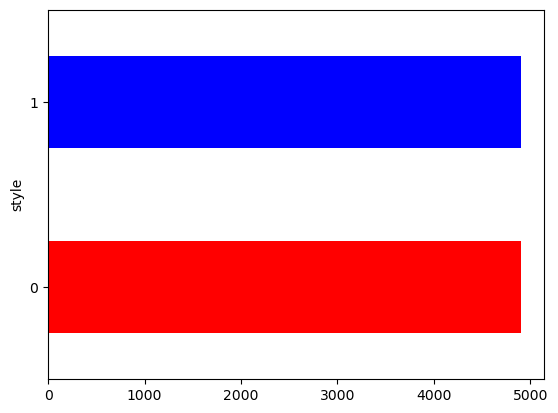

In [61]:
y_bal.value_counts(ascending=True).plot(kind = 'barh', color = ['red','blue']);

# Standardization

In [62]:
obj_padronizado = StandardScaler().fit(X_bal)
df_padronizado = obj_padronizado.transform(X_bal)
df_padronizado = pd.DataFrame(df_padronizado)
df_padronizado.columns = list(X_bal.columns)
df_padronizado.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-0.114144,1.609084,-1.882673,-0.605787,0.240198,-0.859018,-0.982128,0.867874,1.653465,-0.080803,-0.941509,-0.805808
1,0.157790,2.587227,-1.882673,-0.438327,0.803200,-0.040190,-0.426774,0.508958,-0.316645,0.689935,-0.581610,-0.805808
2,0.157790,1.935131,-1.630765,-0.510096,0.649654,-0.625067,-0.645550,0.580741,0.064666,0.497250,-0.581610,-0.805808
3,2.469231,-0.673250,1.644042,-0.605787,0.214607,-0.508092,-0.544577,0.939658,-0.570853,0.047653,-0.581610,0.382286
4,-0.114144,1.609084,-1.882673,-0.605787,0.240198,-0.859018,-0.982128,0.867874,1.653465,-0.080803,-0.941509,-0.805808


In [63]:
df_padronizado.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,9796.0,3.945848e-16,1.000051,-2.561552,-0.658013,-0.225866,0.421815,5.664458
volatile_acidity,9796.0,0.000000e+00,1.000051,-1.760075,-0.781932,-0.238519,0.744153,6.391116
citric_acid,9796.0,-5.338500e-16,1.000051,-1.882673,-0.574505,0.006639,0.604789,8.571519
residual_sugar,9796.0,-1.624761e-16,1.000051,-0.916783,-0.605787,-0.490149,0.327202,14.680867
chlorides,9796.0,-3.365576e-16,1.000051,-1.474400,-0.604306,-0.169258,0.357738,13.931389
free_sulfur_dioxide,9796.0,-2.321087e-17,1.000051,-1.443895,-0.800531,-0.157166,0.595171,15.400564
total_sulfur_dioxide,9796.0,9.284348e-17,1.000051,-1.453338,-0.915664,-0.055852,0.734421,5.850410
density,9796.0,-5.997689e-14,1.000051,-2.968942,-0.675466,0.158225,0.695595,15.648051
pH,9796.0,-1.868475e-15,1.000051,-3.367139,-0.697957,0.001114,0.700186,4.831063
sulphates,9796.0,5.802717e-16,1.000051,-2.264560,-0.683322,-0.097631,0.497250,9.168050


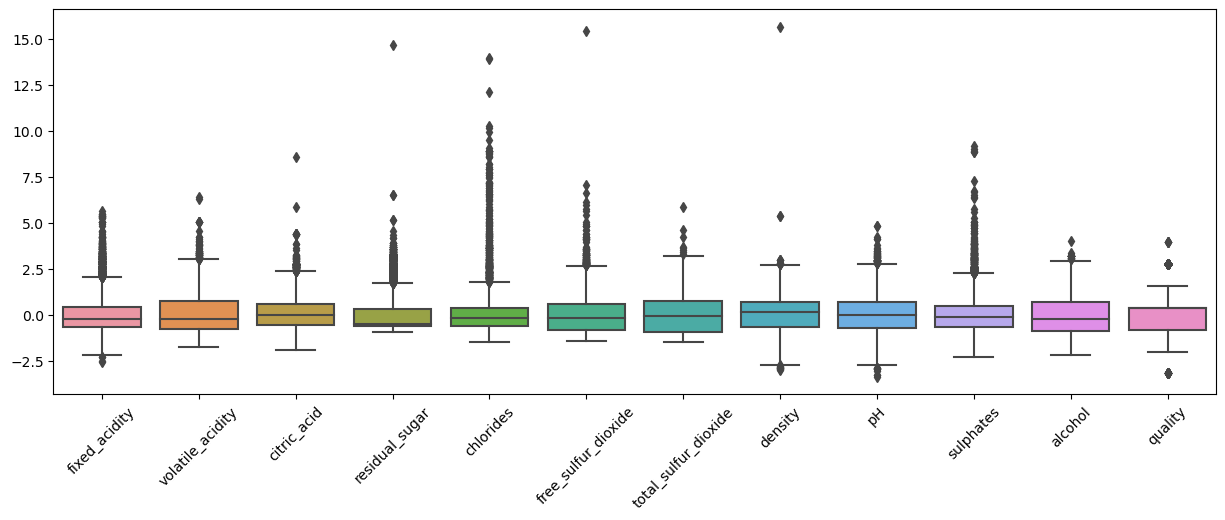

In [64]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_padronizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Normalization

In [65]:
obj_normalizado = MinMaxScaler().fit(X_bal)
df_normalizado = obj_normalizado.transform(X_bal)
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = list(X_bal.columns)
df_normalizado.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333


In [66]:
df_normalizado.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,9796.0,0.311397,0.121572,0.0,0.231405,0.283939,0.362675,1.0
volatile_acidity,9796.0,0.215929,0.122688,0.0,0.120000,0.186667,0.307222,1.0
citric_acid,9796.0,0.180088,0.095660,0.0,0.125133,0.180723,0.237939,1.0
residual_sugar,9796.0,0.058777,0.064115,0.0,0.019939,0.027352,0.079755,1.0
chlorides,9796.0,0.095704,0.064914,0.0,0.056478,0.084718,0.118925,1.0
free_sulfur_dioxide,9796.0,0.085719,0.059370,0.0,0.038194,0.076389,0.121053,1.0
total_sulfur_dioxide,9796.0,0.198985,0.136923,0.0,0.073616,0.191338,0.299539,1.0
density,9796.0,0.159475,0.053717,0.0,0.123193,0.167974,0.196838,1.0
pH,9796.0,0.410717,0.121984,0.0,0.325581,0.410853,0.496124,1.0
sulphates,9796.0,0.198079,0.087474,0.0,0.138309,0.189539,0.241573,1.0


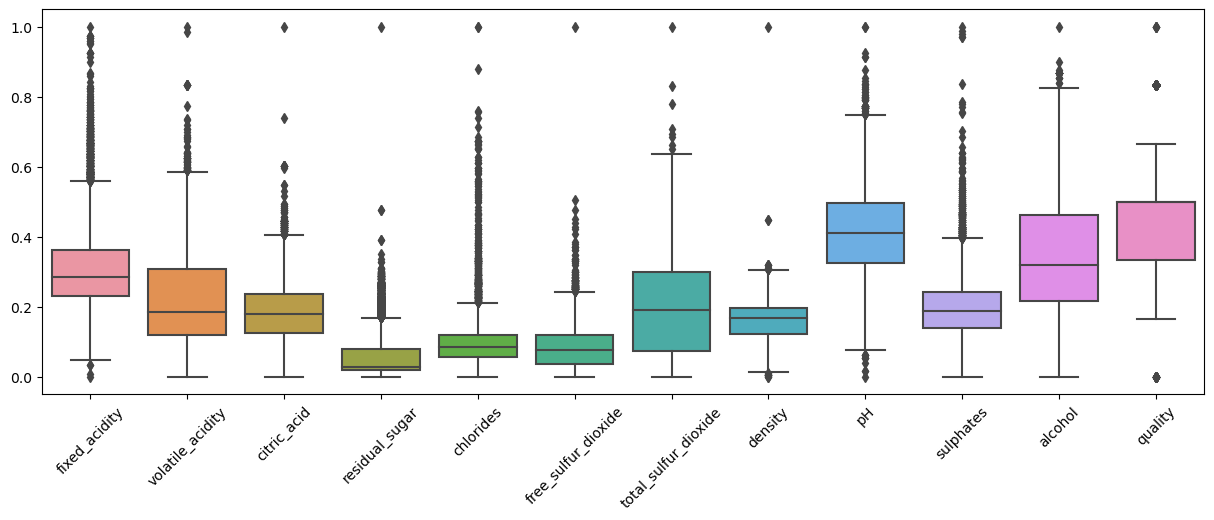

In [67]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_normalizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [68]:
# Separar base de dados em treino e teste
VAR_PREDICTOR = df_padronizado
VAR_TARGET = y_bal
from sklearn.model_selection import train_test_split as tts
X_tr, X_ts, y_tr, y_ts = tts(VAR_PREDICTOR,VAR_TARGET, test_size= 0.3)
X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape, y_tr.value_counts()[0], y_tr.value_counts()[1]

((6857, 12), (2939, 12), (6857,), (2939,), 3417, 3440)

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Extra Trees Classifier
        </b>
    <br/>&nbsp;
</center>

[ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

In [69]:
# Treinar o modelo
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=500, max_depth=10, n_jobs=-1)
etc.fit(X_tr, y_tr)

ExtraTreesClassifier(max_depth=10, n_estimators=500, n_jobs=-1)

In [70]:
# PROPENSÃO respectiva, nas colunas, da variável resposta ser 0 e 1
etc.predict_proba(X_ts)

array([[0.04698797, 0.95301203],
       [0.98605363, 0.01394637],
       [0.0812269 , 0.9187731 ],
       ...,
       [0.79844008, 0.20155992],
       [0.90977851, 0.09022149],
       [0.82603817, 0.17396183]])

In [71]:
pd.DataFrame(etc.predict_proba(X_ts), columns=['Propensão 0', 'Propensão 1']).head()

,Propensão 0,Propensão 1
0,0.046988,0.953012
1,0.986054,0.013946
2,0.081227,0.918773
3,0.963887,0.036113
4,0.016238,0.983762


In [72]:
etc_y_pred = etc.predict(X_ts)

# EVALUATION

In [73]:
# Max e Min
etc_y_pred.min(), etc_y_pred.max()

(0, 1)

In [74]:
# Curva ROC
roc_auc_score(y_ts, etc_y_pred)

0.9949198767377174

In [75]:
# SCORE
etc_acuracia = etc.score(X_ts, y_ts)
print("score AUTO:", etc_acuracia)

score AUTO: 0.9948962232051718


In [76]:
# ACURÁCIA
etc_acuracia = accuracy_score(y_ts, etc_y_pred)
print("accuracy_score AUTO:", etc_acuracia)

accuracy_score AUTO: 0.9948962232051718


In [77]:
# MATRIZ CONFUSÃO
etc_confusion_matrix = confusion_matrix(y_ts, etc_y_pred)
etc_confusion_matrix

array([[1469,   12],
       [   3, 1455]], dtype=int64)

|                     | negativo PRED 0    |    positivo PRED 1   |
|-                    |--------------------|----------------------|
| *negativo REAL 0*   |      VN            |             FP       |
| *positivo REAL 1*   |      FN            |             VP       |

In [78]:
# CÁLCULO MANUAL DA ACURÁCIA
etc_acuracia_manual = (etc_confusion_matrix[0][0] + etc_confusion_matrix[1][1])/(etc_confusion_matrix[0][0] + etc_confusion_matrix[0][1] + etc_confusion_matrix[1][0] + etc_confusion_matrix[1][1])
print(f'Acurácia MANUAL:, {etc_acuracia_manual}')

Acurácia MANUAL:, 0.9948962232051718


In [79]:
print(classification_report(y_ts, etc_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1481
           1       0.99      1.00      0.99      1458

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



In [80]:
etc_f1_score = f1_score(y_ts, etc_y_pred)
etc_f1_score

0.9948717948717948

In [81]:
X_ts[400:413].T

,5294,1453,175,1277,6561,9226,1792,5048,6859,7091,8309,3886,9789
fixed_acidity,-0.793980,0.021823,-0.454062,-0.386078,0.225774,1.991366,-0.658013,-0.658013,-0.697648,0.510271,-0.222183,-0.590029,-0.823000
volatile_acidity,-1.379686,0.467917,0.522258,1.554743,1.554743,-0.626565,-1.379686,-1.379686,1.937104,1.274856,1.048102,0.141870,0.517490
citric_acid,0.636409,0.195570,-1.630765,-1.882673,-0.560155,1.347497,0.258547,0.132593,-0.827868,-0.499336,-0.570750,-0.434201,-0.817089
residual_sugar,-0.749323,-0.605787,-0.701478,-0.605787,-0.557941,-0.647362,0.159742,0.375047,-0.643657,-0.519436,0.292805,0.135819,-0.577060
chlorides,-0.348396,0.189016,0.470517,1.212656,0.342562,0.339581,-0.297213,-0.860216,0.204765,0.326086,1.181549,2.313070,0.248229
free_sulfur_dioxide,2.065367,0.076785,-0.391117,-1.326920,0.427711,-0.915803,0.486199,1.948392,-0.800531,0.333573,1.982655,1.363515,-0.108711
total_sulfur_dioxide,0.902710,-0.123854,-0.729695,-1.386022,0.818565,-1.150418,0.549303,0.599789,-1.020556,0.807730,0.593160,0.885881,-0.799897
density,-1.529687,0.602276,0.150042,0.351035,0.293608,1.030255,-0.424225,-1.242554,0.328674,0.487712,1.226427,-0.241177,0.042214
pH,-0.507301,1.017946,0.636634,0.636634,0.001114,-0.324048,0.700186,-0.380197,1.972256,-0.080717,1.170084,-0.507301,1.985593
sulphates,0.689935,0.047653,1.332216,0.176109,-0.401944,2.001316,-0.979997,0.882619,0.142830,-0.277891,0.910306,-0.530400,0.811131


In [120]:
selection_y_ts = list(y_ts[400:410].values)
selection_y_ts

[1, 0, 0, 0, 0, 0, 1, 1, 0, 0]

In [117]:
prediction = list(etc.predict(X_ts[400:410]))
print(prediction)

[1, 0, 0, 0, 0, 0, 1, 1, 0, 0]


In [119]:
if (selection_y_ts != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(selection, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "selection", "prediction"])
    display (dfp)
    display (dfp.predictio.value_counts())
else:
    print(f'O modelo previu corretamente os resultados em relação a variável "y_ts"')
    print(list(set(selection) - set(prediction)))

O modelo previu corretamente os resultados em relação a variável "y_ts"
[]


# VISUAL

In [85]:
# PROPENSÃO (NÃO É probabilidade)
pred = etc.predict_proba(X_ts)[:,1]

In [86]:
pred.min(), pred.max()

(0.008456461031003235, 0.9963313044498542)

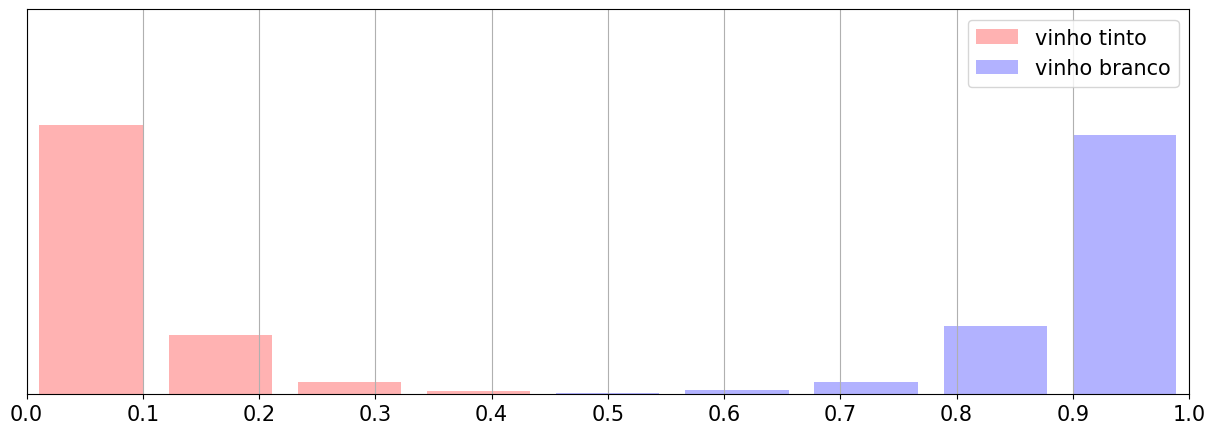

In [87]:
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins=np.linspace(0,1,10), density=True, color='r', alpha=.3, rwidth=.8, label='vinho tinto')
plt.hist(pred[y_ts==1], bins=np.linspace(0,1,10), density=True, color='b', alpha=.3, rwidth=.8, label='vinho branco')

plt.xlim(0, 1)
plt.ylim(0, 10)

plt.xticks(np.arange(0,1.1,0.1), fontsize=15)
plt.yticks([])
plt.legend(fontsize=15)
plt.grid();

# PERSISTENCE

In [88]:
# Salvar
# joblib.dump(etc, r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_classifier_etc.joblib')

In [121]:
# Carregar Modelo Salvo
# model = joblib.load(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_classifier_etc.joblib')
# prediction_persistence = model.predict(X_ts[400:410])
# print(list(prediction_persistence))

[1, 0, 0, 0, 0, 0, 1, 1, 0, 0]


# DEPLOYMENT

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            KNeighbors Classifier
        </b>
    <br/>&nbsp;
</center>

[KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [90]:
# Treinar o modelo
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_tr, y_tr)

KNeighborsClassifier(n_neighbors=3)

In [91]:
neigh_y_pred = neigh.predict(X_ts)

In [92]:
# MATRIZ CONFUSÃO
neigh_confusion_matrix = confusion_matrix(y_ts, neigh_y_pred)
neigh_confusion_matrix

array([[1473,    8],
       [  15, 1443]], dtype=int64)

In [93]:
# ACURÁCIA
neigh_acuracia = accuracy_score(y_ts, neigh_y_pred)
print("Acurácia:", neigh_acuracia)

Acurácia: 0.9921742089145968


In [94]:
print(classification_report(y_ts, neigh_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1481
           1       0.99      0.99      0.99      1458

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



In [95]:
neigh_f1_score = f1_score(y_ts, neigh_y_pred)
neigh_f1_score

0.9920935029219663

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Decision Tree Classifier
        </b>
    <br/>&nbsp;
</center>

[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [96]:
# Treinar o modelo
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_tr, y_tr)

DecisionTreeClassifier()

In [97]:
dtc_y_pred = dtc.predict(X_ts)

In [98]:
# MATRIZ CONFUSÃO
dtc_confusion_matrix = confusion_matrix(y_ts, dtc_y_pred)
dtc_confusion_matrix

array([[1469,   12],
       [  15, 1443]], dtype=int64)

In [99]:
# ACURÁCIA
dtc_acuracia = accuracy_score(y_ts, dtc_y_pred)
print("Acurácia:", dtc_acuracia)

Acurácia: 0.9908132017693093


In [100]:
print(classification_report(y_ts, dtc_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1481
           1       0.99      0.99      0.99      1458

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



In [101]:
dtc_f1_score = f1_score(y_ts, dtc_y_pred)
dtc_f1_score

0.9907312049433573

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Logistic Regression
        </b>
    <br/>&nbsp;
</center>

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [102]:
# Treinar o modelo
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, max_iter =1500)
lr.fit(X_tr, y_tr)

LogisticRegression(max_iter=1500, random_state=0)

In [103]:
lr_y_pred = lr.predict(X_ts)

In [104]:
# MATRIZ CONFUSÃO
lr_confusion_matrix = confusion_matrix(y_ts, lr_y_pred)
lr_confusion_matrix

array([[1467,   14],
       [  10, 1448]], dtype=int64)

In [105]:
# ACURÁCIA
lr_acuracia = accuracy_score(y_ts, lr_y_pred)
print("Acurácia:", lr_acuracia)

Acurácia: 0.9918339571282749


In [106]:
print(classification_report(y_ts, lr_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1481
           1       0.99      0.99      0.99      1458

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



In [107]:
lr_f1_score = f1_score(y_ts, lr_y_pred)
lr_f1_score

0.9917808219178081

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Random Forest Classifier
        </b>
    <br/>&nbsp;
</center>

[Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1_000, max_depth=8, n_jobs=-1)
rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=8, n_estimators=1000, n_jobs=-1)

In [109]:
rf_y_pred = lr.predict(X_ts)

In [110]:
# MATRIZ CONFUSÃO
rf_confusion_matrix = confusion_matrix(y_ts, rf_y_pred)
rf_confusion_matrix

array([[1467,   14],
       [  10, 1448]], dtype=int64)

In [111]:
# ACURÁCIA
rf_acuracia = accuracy_score(y_ts, rf_y_pred)
print("Acurácia:", rf_acuracia)

Acurácia: 0.9918339571282749


In [112]:
print(classification_report(y_ts, rf_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1481
           1       0.99      0.99      0.99      1458

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



In [113]:
rf_f1_score = f1_score(y_ts, lr_y_pred)
rf_f1_score

0.9917808219178081

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Avaliação geral de todos os Modelos
        </b>
    <br/>&nbsp;
</center>

In [114]:
dfm = {
    'modelo':['Extra Trees Classifier', 'KNeighbors Classifier', 'Decision Tree Classifier',
              'Logistic Regression', 'Random Forest Classifier'],
    'acurácia':[etc_acuracia,neigh_acuracia,dtc_acuracia,lr_acuracia, rf_acuracia],
    'f1_score':[etc_f1_score,neigh_f1_score,dtc_f1_score,lr_f1_score, rf_f1_score]
    }    
modelos = pd.DataFrame(dfm)

In [115]:
# modelos.sort_values('f1_score', ascending=False)
modelos.style.highlight_max(subset=['acurácia','f1_score'])

,modelo,acurácia,f1_score
0,Extra Trees Classifier,0.994896,0.994872
1,KNeighbors Classifier,0.992174,0.992094
2,Decision Tree Classifier,0.990813,0.990731
3,Logistic Regression,0.991834,0.991781
4,Random Forest Classifier,0.991834,0.991781
